<a href="https://colab.research.google.com/github/demirhankoc/three_models/blob/main/threemodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
RandomForestRegressor Modeli İçin Ortalama Kare Hatası: 0.3952456579171837
GradientBoostingRegressor Modeli İçin Ortalama Kare Hatası: 0.7036213812829151
SVR Modeli İçin Ortalama Kare Hatası: 0.003005819374781901


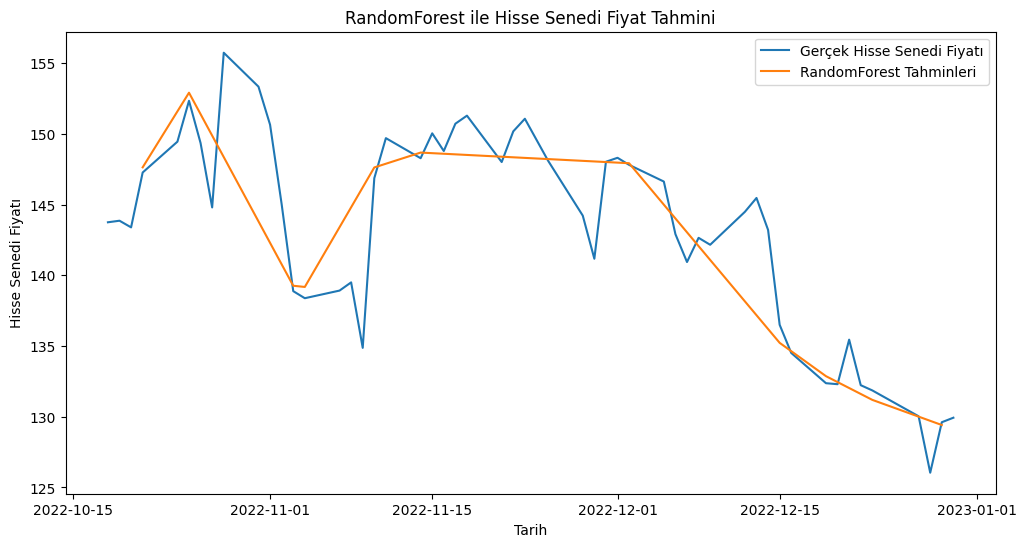

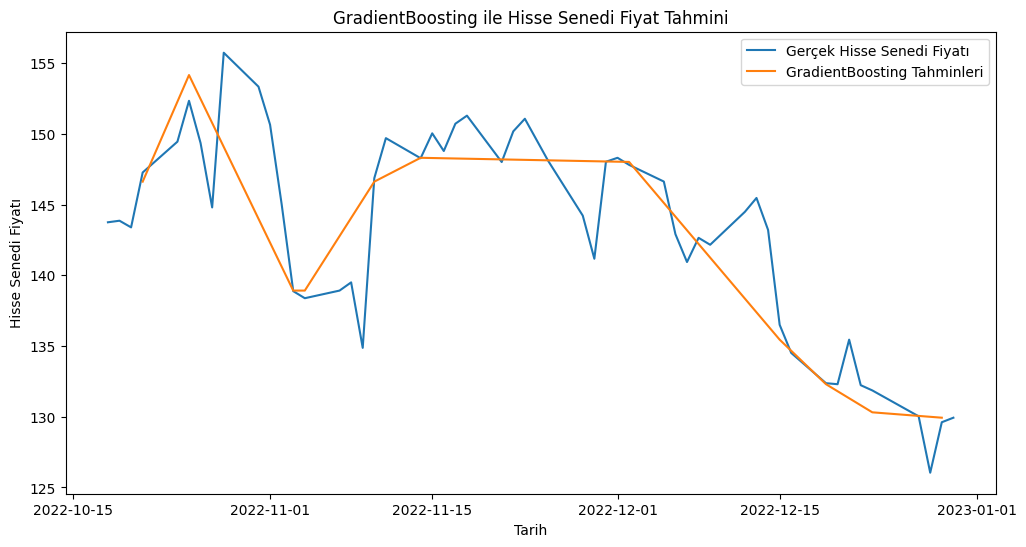

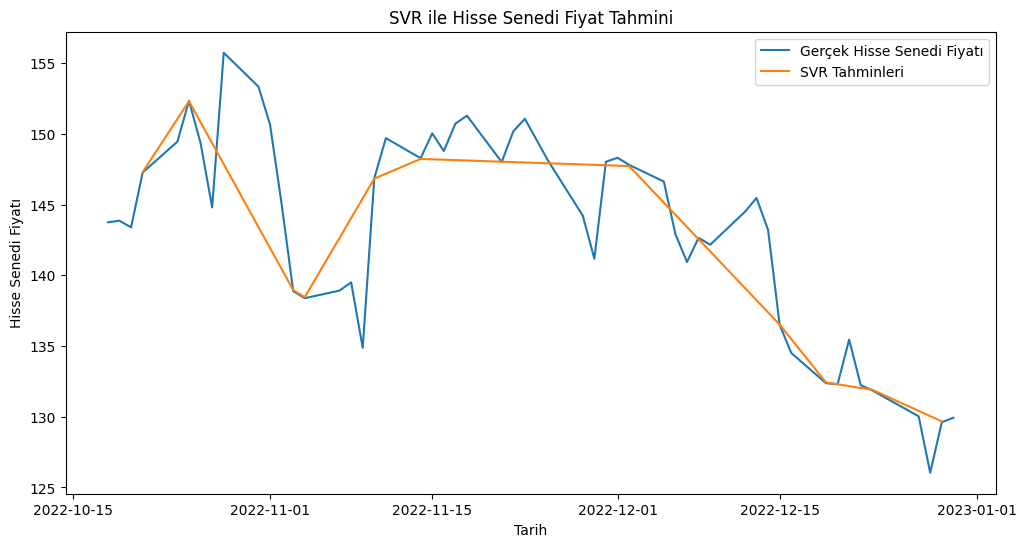

In [10]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Adım 1: Geçmiş hisse senedi fiyat verilerini çek
sembol = 'AAPL'
baslangic_tarihi = '2022-01-01'
bitis_tarihi = '2023-01-01'
veri = yf.download(sembol, start=baslangic_tarihi, end=bitis_tarihi)

# Adım 2: Bir Pandas DataFrame oluştur
df = pd.DataFrame(veri['Close'])

# Adım 3: Özellik mühendisliği
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# Adım 4: Model Eğitimi
df.dropna(inplace=True)

# Özellikler ve hedef değişken
ozellikler = ['Close', 'SMA_50', 'SMA_200']
hedef = 'Close'

X = df[ozellikler]
y = df[hedef]

# Veriyi eğitim ve test setlerine ayır
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelleri Eğit
modeller = [
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, random_state=42),
    SVR(kernel='linear')
]

tahminler = []

for model in modeller:
    model.fit(X_egitim, y_egitim)
    model_tahminleri = model.predict(X_test)
    tahminler.append(model_tahminleri)

    # Modeli Değerlendir
    mse = mean_squared_error(y_test, model_tahminleri)
    print(f'{type(model).__name__} Modeli İçin Ortalama Kare Hatası: {mse}')

# Tahminleri bir DataFrame'e dönüştür
tahminler_df = pd.DataFrame({
    'Gerçek': y_test.values,
    'RandomForest': tahminler[0],
    'GradientBoosting': tahminler[1],
    'SVR': tahminler[2]
}, index=X_test.index)

# Adım 5: Seaborn ile Görselleştirme
plt.figure(figsize=(12, 6))

# Gerçek hisse senedi fiyatlarını çiz
sns.lineplot(data=df, x=df.index, y='Close', label='Gerçek Hisse Senedi Fiyatı')

# RandomForest tahminlerini çiz
sns.lineplot(data=tahminler_df, x=tahminler_df.index, y='RandomForest', label='RandomForest Tahminleri')

# Grafiği özelleştir
plt.title('RandomForest ile Hisse Senedi Fiyat Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Hisse Senedi Fiyatı')
plt.legend()
plt.show()

# Diğer modeller için süreci tekrarlayın (GradientBoosting ve SVR)
# ...

# GradientBoosting için örnek
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Close', label='Gerçek Hisse Senedi Fiyatı')
sns.lineplot(data=tahminler_df, x=tahminler_df.index, y='GradientBoosting', label='GradientBoosting Tahminleri')
plt.title('GradientBoosting ile Hisse Senedi Fiyat Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Hisse Senedi Fiyatı')
plt.legend()
plt.show()

# SVR için örnek
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Close', label='Gerçek Hisse Senedi Fiyatı')
sns.lineplot(data=tahminler_df, x=tahminler_df.index, y='SVR', label='SVR Tahminleri')
plt.title('SVR ile Hisse Senedi Fiyat Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Hisse Senedi Fiyatı')
plt.legend()
plt.show()



